<font size=4 color='orange'>Automobile Dataset Analysis

__Source:__ https://www.kaggle.com/fazilbtopal/auto85?select=auto.csv<br>

__Some information about data from source:__<br>
Number of Instances: 205<br>

Number of Attributes: 26 total<br>
-- 15 continuous<br>
-- 1 integer<br>
-- 10 nominal <br>

__Attribute Information:__<br>

| Attribute | Attribute Range<br>

-- symboling: -3, -2, -1, 0, 1, 2, 3<br>
-- normalized-losses: continuous from 65 to 256<br>
-- make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo<br>
-- fuel-type: diesel, gas<br>
-- aspiration: std, turbo<br>
-- num-of-doors: four, two<br>
-- body-style: hardtop, wagon, sedan, hatchback, convertible<br>
-- drive-wheels: 4wd, fwd, rwd<br>
-- engine-location: front, rear<br>
-- wheel-base: continuous from 86.6 120.9<br>
-- length: continuous from 141.1 to 208.1<br>
-- width: continuous from 60.3 to 72.3<br>
-- height: continuous from 47.8 to 59.8<br>
-- curb-weight: continuous from 1488 to 4066<br>
-- engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor<br>
-- num-of-cylinders: eight, five, four, six, three, twelve, two<br>
-- engine-size: continuous from 61 to 326<br>
-- fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi<br>
-- bore: continuous from 2.54 to 3.94<br>
-- stroke: continuous from 2.07 to 4.17<br>
-- compression-ratio: continuous from 7 to 23<br>
-- horsepower: continuous from 48 to 288<br>
-- peak-rpm: continuous from 4150 to 6600<br>
-- city-mpg: continuous from 13 to 49<br>
-- highway-mpg: continuous from 16 to 54<br>
-- price: continuous from 5118 to 45400.


__Importing Libraries__

In [2]:
import pandas as pd #To read and edit tabular data
import numpy as np #To perform array/matrix operations
import matplotlib.pyplot as plt #To perform plotting
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline
import seaborn as sns  #To perform visualization
sns.set_style('whitegrid')
import warnings #To ignore warnings
warnings.filterwarnings('ignore')
from collections import defaultdict
from scipy.sparse import hstack
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

**Reading the data**

In [3]:
#reading the file
data = pd.read_csv('auto.csv')

In [4]:
#checking first 5 rows of the data
data.head()

,symobling,normalized_loss,make,fuel_type,aspiration,doors,style,wheel,engine,wheel_base,...,engine_size,fuel-system,bore,stroke,compression,hp,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
#checking info() to see total data points and features, also for missing entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   symobling        205 non-null    int64  
 1   normalized_loss  205 non-null    object 
 2   make             205 non-null    object 
 3   fuel_type        205 non-null    object 
 4   aspiration       205 non-null    object 
 5   doors            205 non-null    object 
 6   style            205 non-null    object 
 7   wheel            205 non-null    object 
 8   engine           205 non-null    object 
 9   wheel_base       205 non-null    float64
 10  length           205 non-null    float64
 11  width            205 non-null    float64
 12  height           205 non-null    float64
 13  curb_weight      205 non-null    int64  
 14  engine_type      205 non-null    object 
 15  cylcinders       205 non-null    object 
 16  engine_size      205 non-null    int64  
 17  fuel-system     

__Observation:__
1. There are 205 data points in the data
2. No missing values
3. 25 independent variables and 1 target variable 'Price'
4. We have a regression problem.

checking categorical and numerical features separately

In [6]:
#Looking into numerical features
data.select_dtypes(include='number').head()

,symobling,wheel_base,length,width,height,curb_weight,engine_size,compression,city_mpg,highway_mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22


In [7]:
#Looking into categorical features
data.select_dtypes(exclude='number').head()

,normalized_loss,make,fuel_type,aspiration,doors,style,wheel,engine,engine_type,cylcinders,fuel-system,bore,stroke,hp,peak_rpm,price
0,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,16500
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,102,5500,13950
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,115,5500,17450


__Observation:__
1. features like 'normalized_loss', 'bore', 'stroke', 'hp', 'peak_rpm', 'price' are actually numerical features but interpreted as 'categorical'

converting above features into numerical features

1. loss

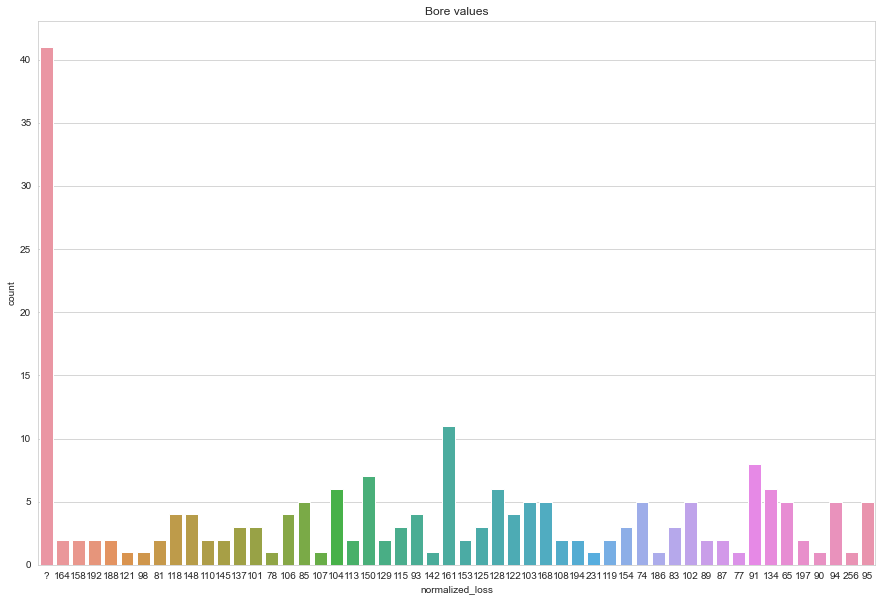

In [8]:
plt.figure(figsize=(15, 10))
sns.countplot(data['normalized_loss'])
plt.title("Bore values")
plt.show()

there are few entries as '?' which makes it as an object type

In [9]:
def return_number(value):
    if '?' in value:
        return 0
    else:
        return float(value)

In [10]:
data['normalized_loss'] = data['normalized_loss'].apply(lambda x: return_number(x))

In [11]:
data['normalized_loss'].describe()

count    205.000000
mean      97.600000
std       58.282073
min        0.000000
25%       77.000000
50%      103.000000
75%      137.000000
max      256.000000
Name: normalized_loss, dtype: float64

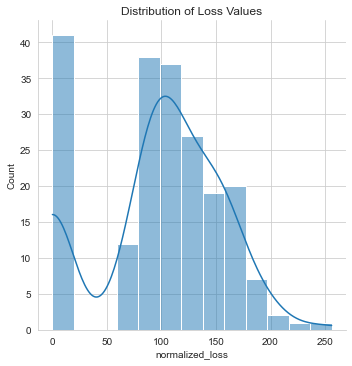

In [13]:
sns.displot(data.normalized_loss, kde=True)
plt.title("Distribution of Loss Values")
plt.show()

replacing '0' with median

In [340]:
data['normalized_loss'] = data['normalized_loss'].apply(lambda x: data['normalized_loss'].median() if (x==0) else x)

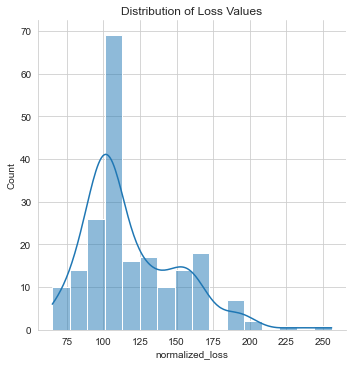

In [341]:
sns.displot(data.normalized_loss, kde=True)
plt.title("Distribution of Loss Values")
plt.show()

In [342]:
data['normalized_loss'] = data['normalized_loss'].apply(lambda x: data['normalized_loss'].median() if (x>170) else x)

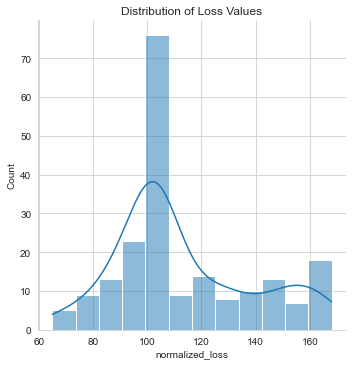

In [343]:
sns.displot(data.normalized_loss, kde=True)
plt.title("Distribution of Loss Values")
plt.show()

As there are very few entries for loss whose values are above 170, we replaced them into median values

2. Bore

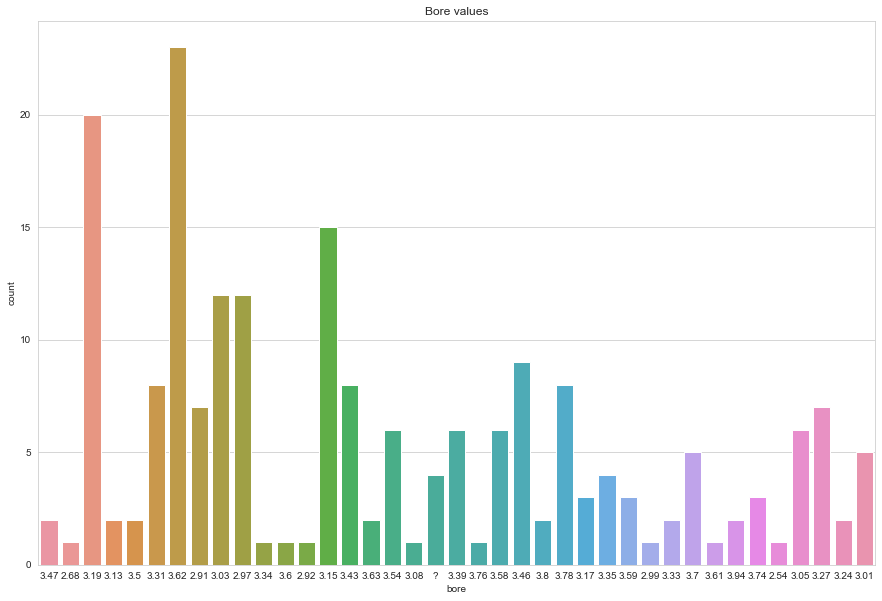

In [344]:
plt.figure(figsize=(15, 10))
sns.countplot(data['bore'])
plt.title("Bore values")
plt.show()

there are few entries as '?' which makes it as an object type

In [345]:
data['bore'] = data['bore'].apply(lambda x: return_number(x))

In [346]:
data['bore'].describe()

count    205.000000
mean       3.264780
std        0.535268
min        0.000000
25%        3.130000
50%        3.310000
75%        3.580000
max        3.940000
Name: bore, dtype: float64

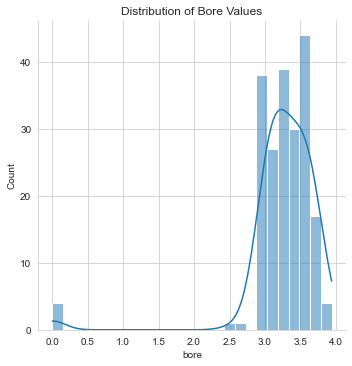

In [347]:
sns.displot(data.bore, kde=True)
plt.title("Distribution of Bore Values")
plt.show()

replacing '0' with median

In [348]:
data['bore'] = data['bore'].apply(lambda x: data['bore'].median() if (x==0) else x)

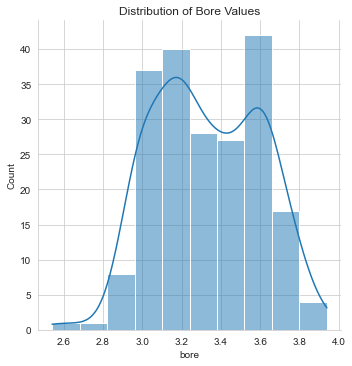

In [349]:
sns.displot(data.bore, kde=True)
plt.title("Distribution of Bore Values")
plt.show()

3. Stroke

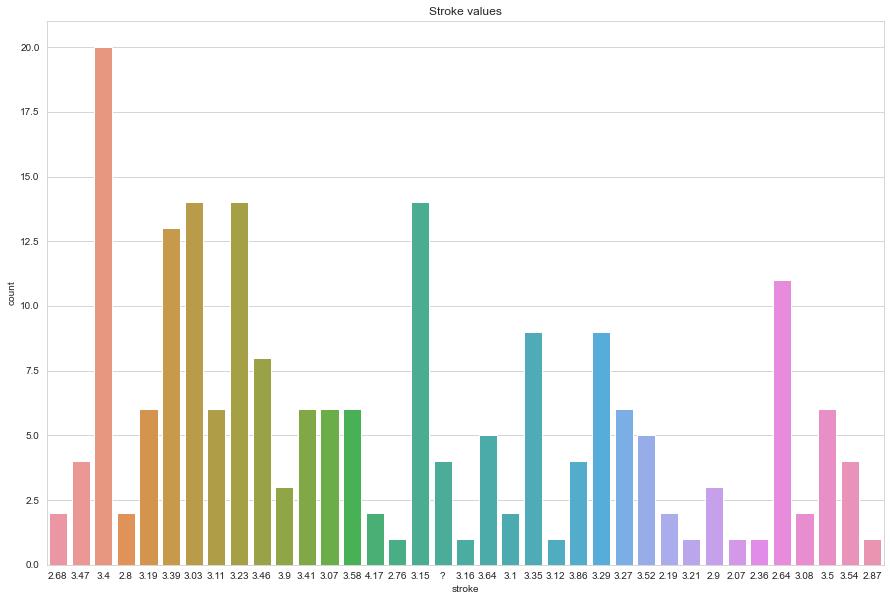

In [350]:
plt.figure(figsize=(15, 10))
sns.countplot(data['stroke'])
plt.title("Stroke values")
plt.show()

there are few entries as '?' which makes it as an object type

In [351]:
data['stroke'] = data['stroke'].apply(lambda x: return_number(x))

In [352]:
data['stroke'].describe()

count    205.000000
mean       3.191902
std        0.549625
min        0.000000
25%        3.100000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

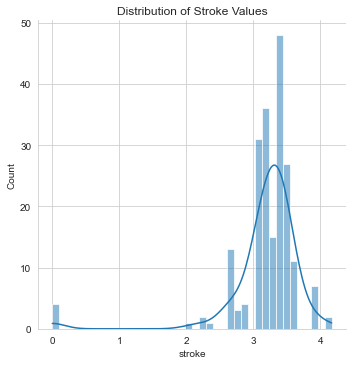

In [353]:
sns.displot(data.stroke, kde=True)
plt.title("Distribution of Stroke Values")
plt.show()

replacing '0' with median

In [354]:
data['stroke'] = data['stroke'].apply(lambda x: data['stroke'].median() if (x==0) else x)

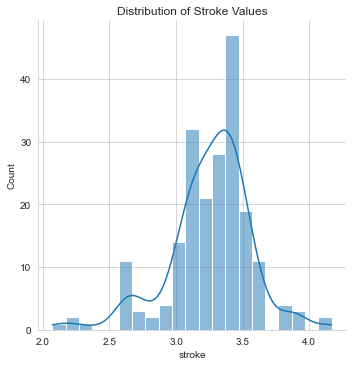

In [355]:
sns.displot(data.stroke, kde=True)
plt.title("Distribution of Stroke Values")
plt.show()

In [356]:
data['stroke'] = data['stroke'].apply(lambda x: data['stroke'].median() if (x<2.50) else x)

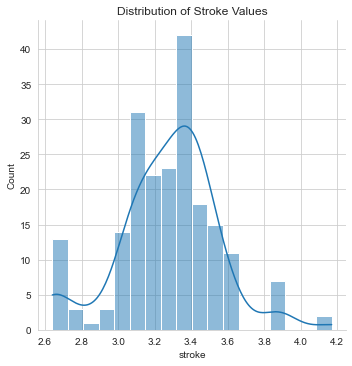

In [357]:
sns.displot(data.stroke, kde=True)
plt.title("Distribution of Stroke Values")
plt.show()

4. hp

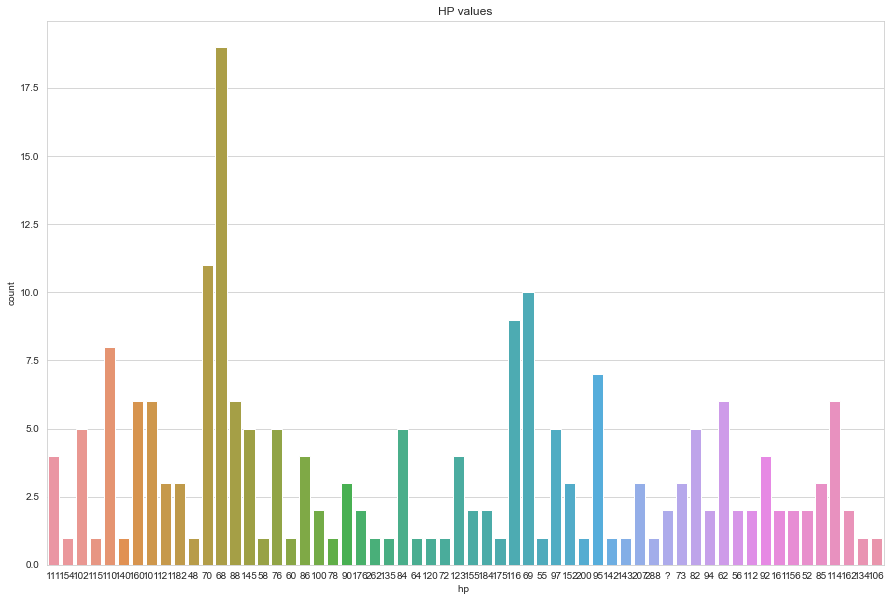

In [358]:
plt.figure(figsize=(15, 10))
sns.countplot(data['hp '])
plt.title("HP values")
plt.show()

there are few entries as '?' which makes it as an object type

In [359]:
data['hp '] = data['hp '].apply(lambda x: return_number(x))

In [360]:
data['hp '].describe()

count    205.000000
mean     103.239024
std       40.832470
min        0.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: hp , dtype: float64

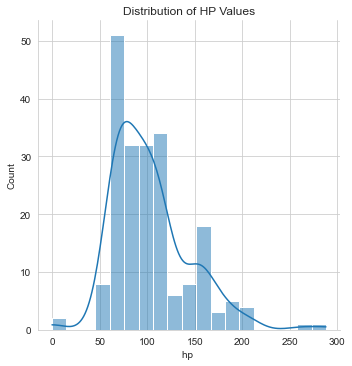

In [361]:
sns.displot(data['hp '], kde=True)
plt.title("Distribution of HP Values")
plt.show()

replacing '0' with median

In [362]:
data['hp '] = data['hp '].apply(lambda x: data['hp '].median() if (x==0 or x>250) else x)

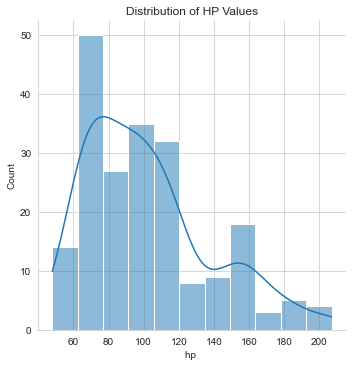

In [363]:
sns.displot(data['hp '], kde=True)
plt.title("Distribution of HP Values")
plt.show()

5. peak_rpm

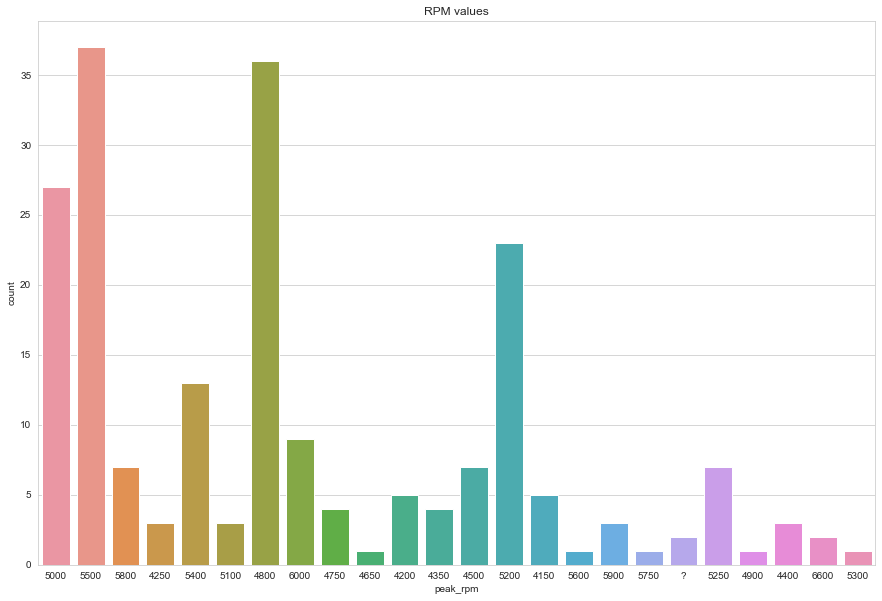

In [364]:
plt.figure(figsize=(15, 10))
sns.countplot(data['peak_rpm'])
plt.title("RPM values")
plt.show()

there are few entries as '?' which makes it as an object type

In [365]:
data['peak_rpm'] = data['peak_rpm'].apply(lambda x: return_number(x))

In [366]:
data['peak_rpm'].describe()

count     205.000000
mean     5075.365854
std       694.650771
min         0.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak_rpm, dtype: float64

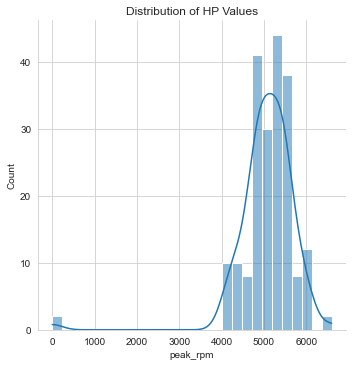

In [367]:
sns.displot(data['peak_rpm'], kde=True)
plt.title("Distribution of HP Values")
plt.show()

replacing '0' with median

In [368]:
data['peak_rpm'] = data['peak_rpm'].apply(lambda x: data['peak_rpm'].median() if (x==0) else x)

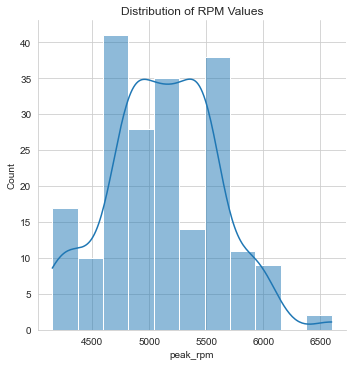

In [369]:
sns.displot(data['peak_rpm'], kde=True)
plt.title("Distribution of RPM Values")
plt.show()

In [370]:
data['peak_rpm'] = data['peak_rpm'].apply(lambda x: data['peak_rpm'].median() if (x>6300) else x)

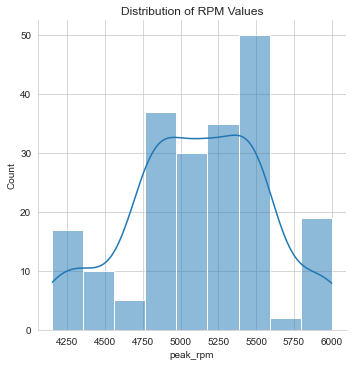

In [371]:
sns.displot(data['peak_rpm'], kde=True)
plt.title("Distribution of RPM Values")
plt.show()

6. Price

In [372]:
data['price'].value_counts()

?        4
6229     2
7775     2
7898     2
13499    2
        ..
11248    1
28176    1
12945    1
36880    1
11048    1
Name: price, Length: 187, dtype: int64

there are few entries as '?' which makes it as an object type

In [373]:
data['price'] = data['price'].apply(lambda x: return_number(x))

In [374]:
data['price'].describe()

count      205.000000
mean     12949.429268
std       8079.043284
min          0.000000
25%       7689.000000
50%      10198.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

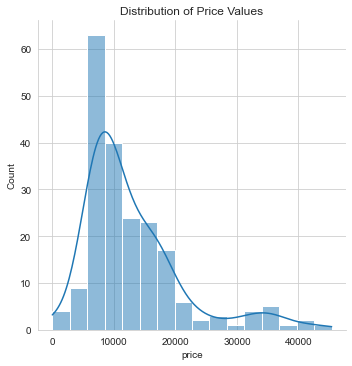

In [375]:
sns.displot(data['price'], kde=True)
plt.title("Distribution of Price Values")
plt.show()

checking categorical and numerical features separately

In [376]:
#Looking into numerical features
data.select_dtypes(include='number').head()

,symobling,normalized_loss,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression,hp,peak_rpm,city_mpg,highway_mpg,price
0,3,103.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,103.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,103.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [377]:
#Looking into categorical features
data.select_dtypes(exclude='number').head()

,make,fuel_type,aspiration,doors,style,wheel,engine,engine_type,cylcinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


__Analysing Numerical Featues__

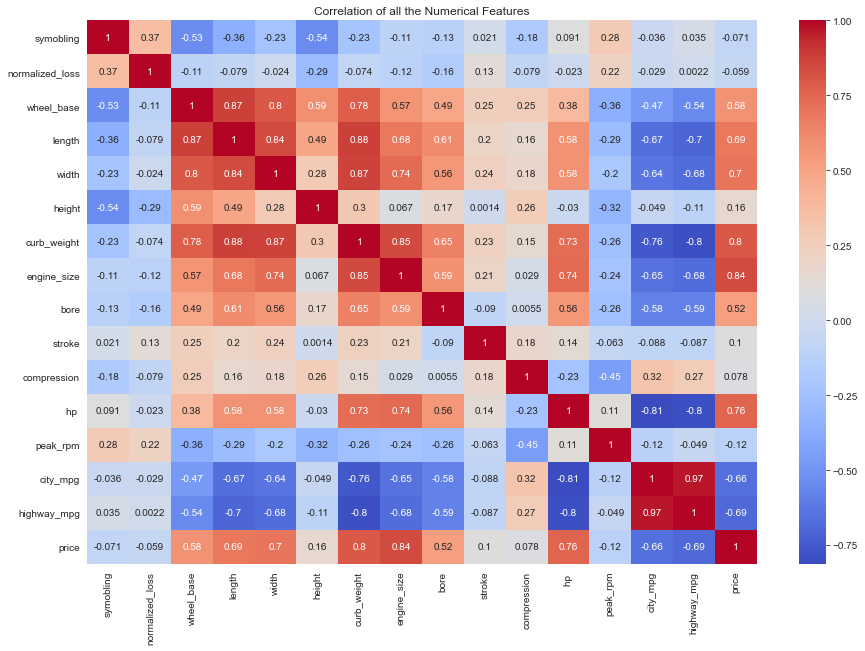

In [378]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of all the Numerical Features")
plt.show()

__Observation:__
1. Miles per gallon is separately mentioned for city and highway and they are having high correlation with themselves
2. height, weight, width etc., are having high correlation in themselves

Combining both 'mpg' features

In [379]:
data['mpg'] = (data['city_mpg']+data['highway_mpg'])/2
data.drop(['city_mpg', 'highway_mpg'], axis=1, inplace=True)

Combining all the dimesional features

In [380]:
data['vol'] = (data['width']*data['length']*data['height'])/(12.54**3)
data.drop(['width', 'length', 'height'], axis=1, inplace=True)

Looking into the data

In [381]:
#Looking into numerical features
data.select_dtypes(include='number').head()

,symobling,normalized_loss,wheel_base,curb_weight,engine_size,bore,stroke,compression,hp,peak_rpm,price,mpg,vol
0,3,103.0,88.6,2548,130,3.47,2.68,9.0,111.0,5000.0,13495.0,24.0,267.767389
1,3,103.0,88.6,2548,130,3.47,2.68,9.0,111.0,5000.0,16500.0,24.0,267.767389
2,1,103.0,94.5,2823,152,2.68,3.47,9.0,154.0,5000.0,16500.0,22.5,297.977682
3,2,164.0,99.8,2337,109,3.19,3.40,10.0,102.0,5500.0,13950.0,27.0,321.925893
4,2,164.0,99.4,2824,136,3.19,3.40,8.0,115.0,5500.0,17450.0,20.0,322.898479


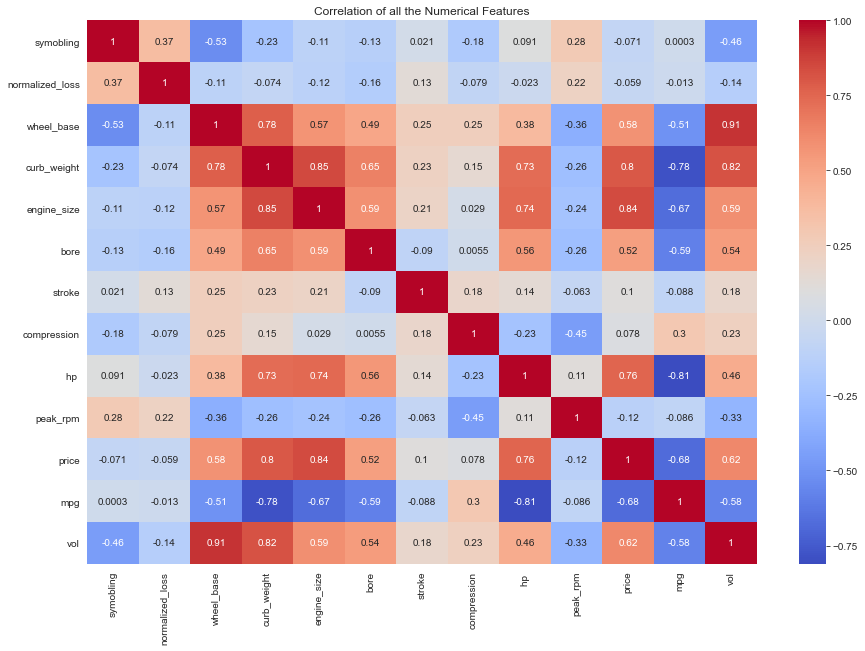

In [382]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of all the Numerical Features")
plt.show()

Working on 'wheel base', 'curb weight', 'engine size'

In [383]:
data['weight'] = (data['wheel_base']*data['curb_weight']*data['engine_size'])/3
data.drop(['wheel_base', 'curb_weight', 'engine_size'], axis=1, inplace=True)

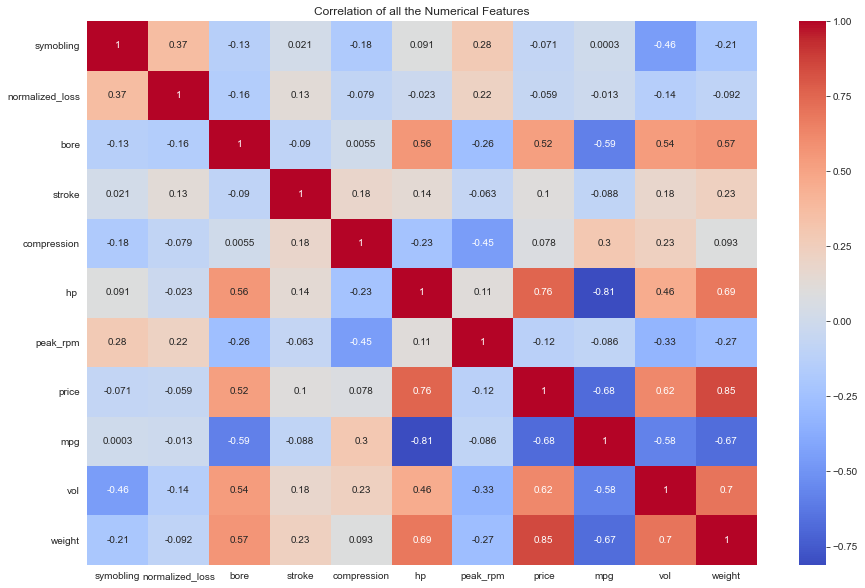

In [384]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of all the Numerical Features")
plt.show()

In [385]:
data['size'] = (data['vol']*data['weight'])/9.81
data.drop(['vol', 'weight'], axis=1, inplace=True)

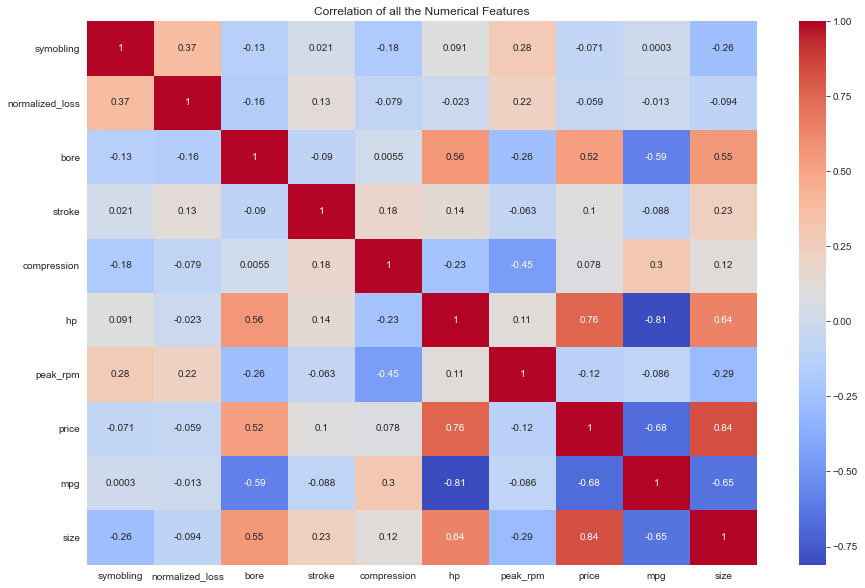

In [386]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of all the Numerical Features")
plt.show()

In [387]:
data['force'] = (data['hp '])/(data['bore']*data['stroke'])
data.drop(['bore', 'stroke', 'hp '], axis=1, inplace=True)

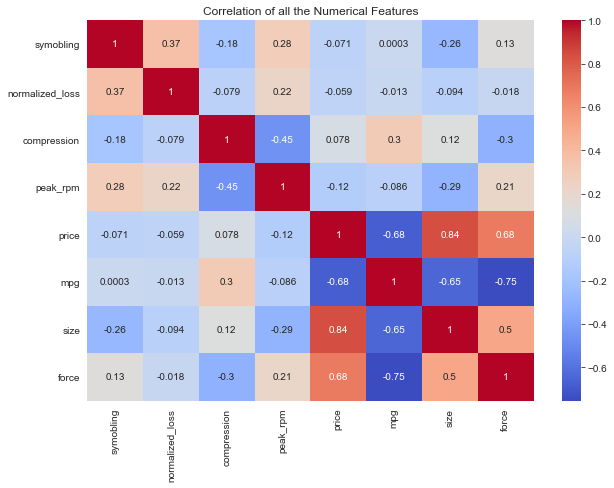

In [388]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of all the Numerical Features")
plt.show()

After doing some feature engineering, we can identify that the new features we had created has high correlation with 'price' and 'mpg'. So we can drop the other features except the new features

In [389]:
data.drop(['symobling', 'normalized_loss', 'compression', 'peak_rpm'], axis=1, inplace=True)

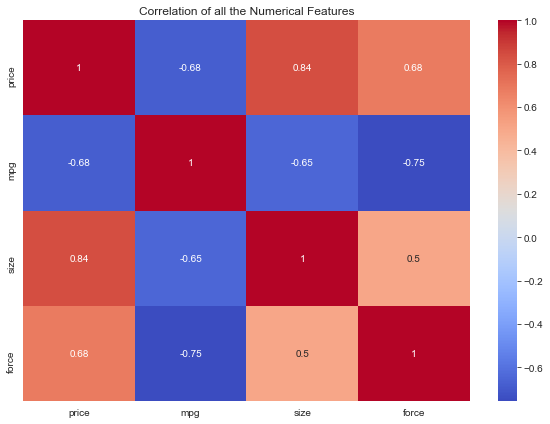

In [390]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of all the Numerical Features")
plt.show()

__Observations:__ on Numerical features 
1. Newly created features have high correlation with miles per gallon and price. So we can predict the values of 'price' or 'mpg' using 'force' and 'size' for better results

__Analysing Categorical Features__

In [391]:
#Looking into categorical features
data.select_dtypes(exclude='number').head()

,make,fuel_type,aspiration,doors,style,wheel,engine,engine_type,cylcinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [392]:
cat_columns = data.select_dtypes(exclude='number').columns

Plotting 'Price' variation with Categorical Features

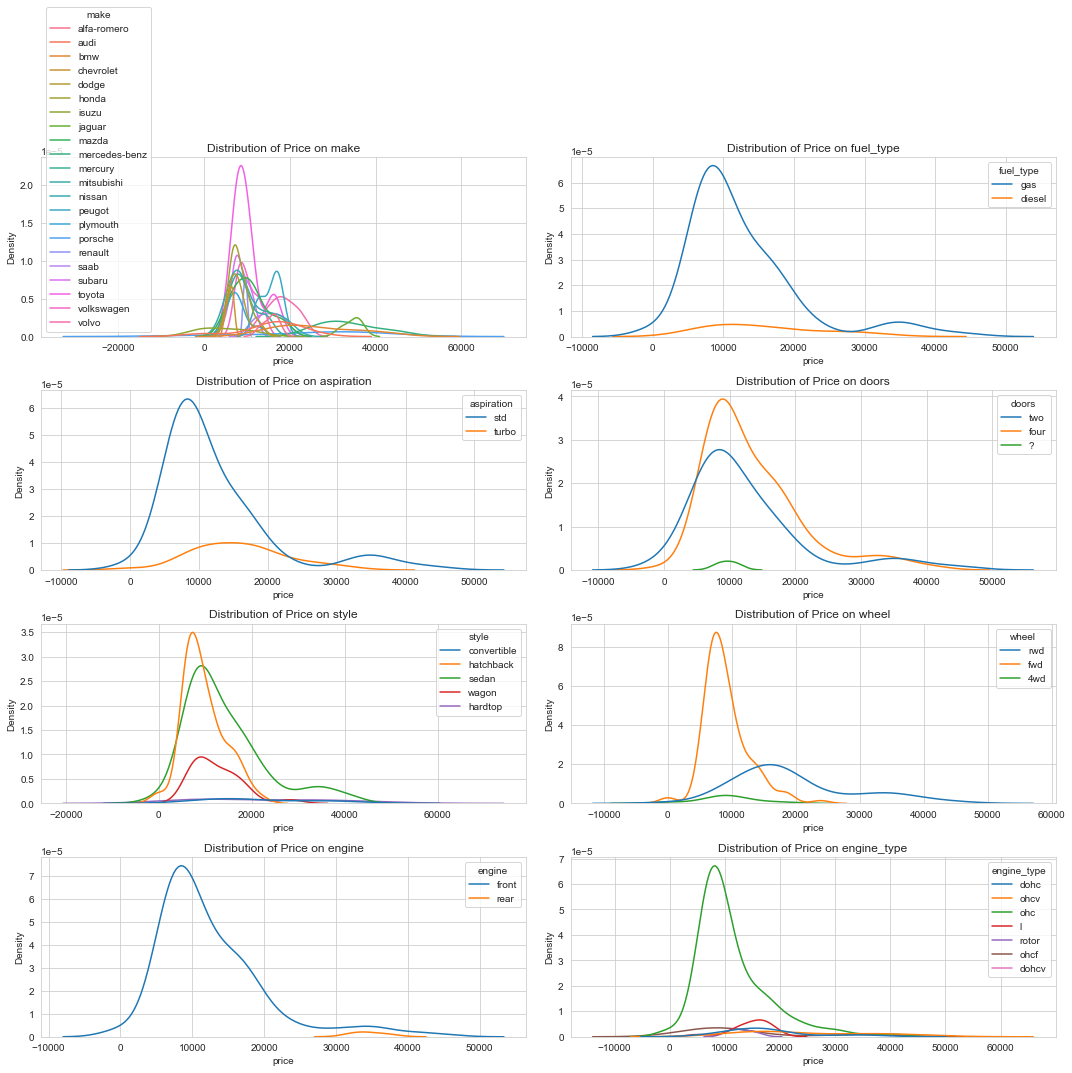

In [393]:
#plotting distribution plots for all the features
fig, axes = plt.subplots(4, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

for ax, col in zip(axes.flatten(), cat_columns):
    sns.kdeplot(ax=ax, data=data, x='price', hue=col)
    ax.set_title("Distribution of Price on "+str(col))
    plt.tight_layout()

__Observation:__
1. Features like 'make', 'engine_type', 'style' has highly overlapping distributions. Means these categorical features are less useful to predict price

Plotting 'mpg' variation with Categorical Features

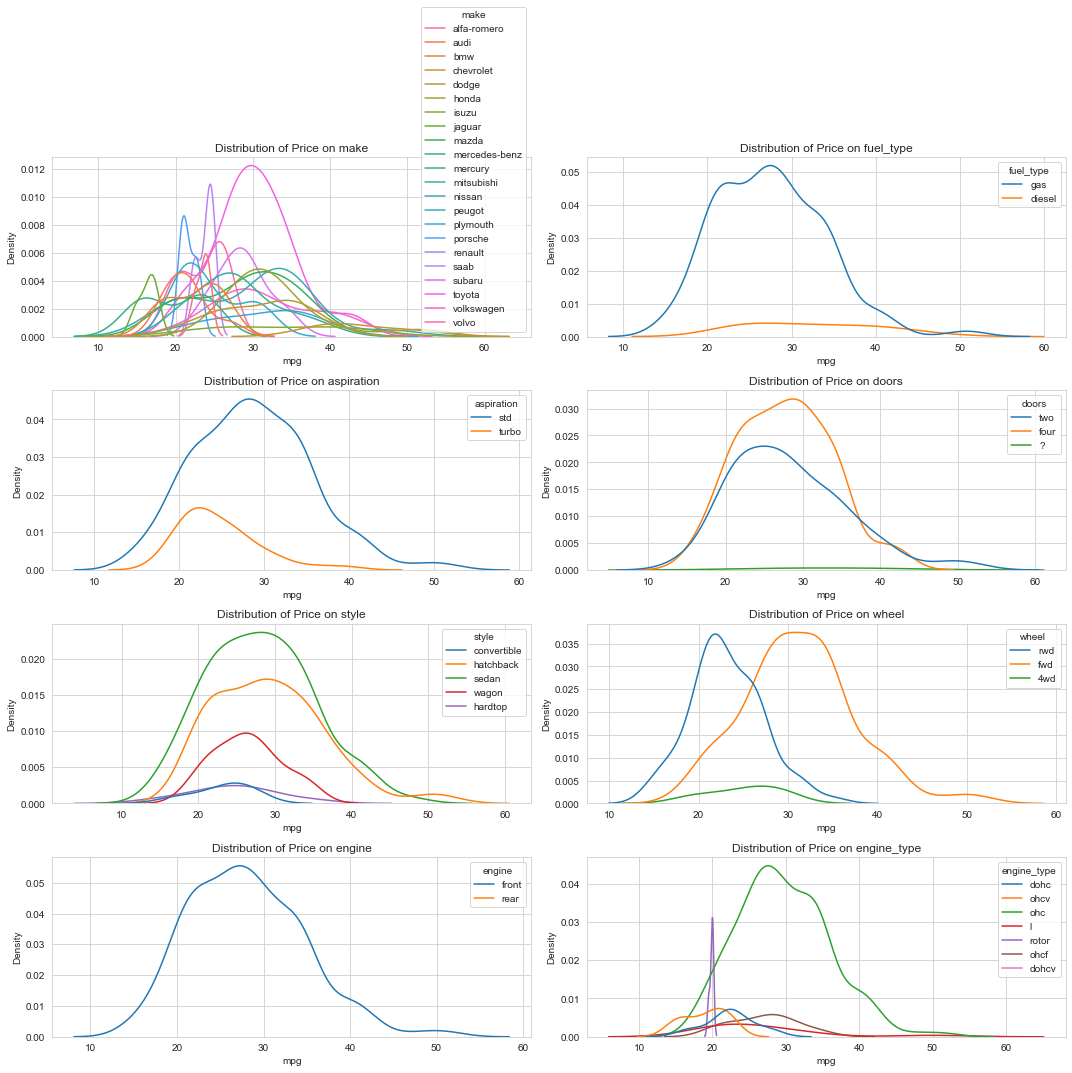

In [394]:
#plotting distribution plots for all the features
fig, axes = plt.subplots(4, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

for ax, col in zip(axes.flatten(), cat_columns):
    sns.kdeplot(ax=ax, data=data, x='mpg', hue=col)
    ax.set_title("Distribution of Price on "+str(col))
    plt.tight_layout()

__Observation:__
1. Features like 'make', 'doors', 'style' and 'engine_type' has highly overlapping distributions. Means these categorical features are less useful to predict Miles Per Gallon

In [395]:
data.drop(['make', 'style', 'engine_type', 'doors'], axis=1, inplace=True)

In [396]:
data.to_csv("Cleaned_Data.csv", index=False)